In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Project_Data_1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sales of Wheat in tons  207 non-null    object
 1   1990                    207 non-null    object
 2   1991                    207 non-null    object
 3   1992                    207 non-null    object
 4   1993                    207 non-null    object
 5   1994                    207 non-null    object
 6   1995                    207 non-null    object
 7   1996                    207 non-null    int64 
 8   1997                    207 non-null    int64 
 9   1998                    207 non-null    int64 
 10  1999                    207 non-null    int64 
 11  2000                    207 non-null    int64 
 12  2001                    207 non-null    int64 
 13  2002                    207 non-null    int64 
 14  2003                    207 non-null    int64 
 15  2004  

In [3]:
data.head()

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [4]:
# data=data.rename(columns={"Sales of Wheat in tons":"Countries"},inplace=True)


In [5]:
data.isna().sum()

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

In [6]:
data1=data.drop("Sales of Wheat in tons",axis=1)


In [7]:
data1=data1.replace(',','',regex=True)

In [8]:
data1=data1.astype(int)

In [9]:
data1.var().round(2)

1990    54002.82
1991    52592.09
1992    50537.52
1993    48441.28
1994    46980.66
1995    45146.72
1996    37553.31
1997    36968.68
1998    35661.71
1999    38049.55
2000    39775.72
2001    42067.09
2002    42156.97
2003    44214.54
2004    44304.75
2005    44613.23
2006    44545.36
2007    45048.61
dtype: float64

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data1)
data1.var()

1.0

In [11]:
pca = PCA(0.95)
pca=pca.fit(data1)
pca.n_components_ 

2

In [12]:
pca.explained_variance_

array([16.6475819,  1.0318674])

In [13]:
pca.explained_variance_ratio_

array([0.92039771, 0.05704903])

In [14]:
pca=pca.transform(data1)


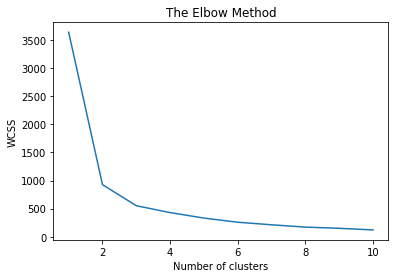

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca)

In [17]:
kmeans= KMeans(n_clusters=3).fit(pca)

# cluster_map = pd.DataFrame()
# cluster_map['data_index'] = data.index.values
labels=pd.DataFrame(kmeans.labels_)
labels.head(10)

,0
0,1
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


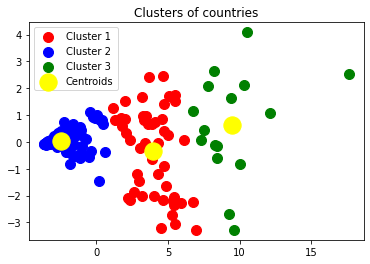

In [18]:
plt.scatter(pca[y_kmeans == 0, 0], pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca[y_kmeans == 1, 0], pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca[y_kmeans == 2, 0], pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countries')
# plt.xlabel('pca1')
# plt.ylabel('pca2')
plt.legend()
plt.show()

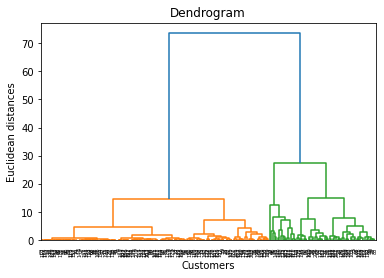

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pca)

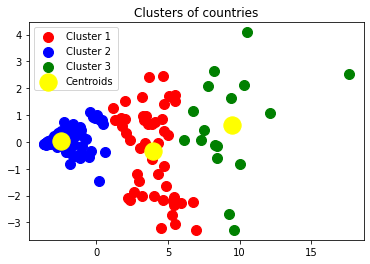

In [21]:
plt.scatter(pca[y_hc == 0, 0], pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca[y_hc == 1, 0], pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca[y_hc == 2, 0], pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countries')
# plt.xlabel('pca1')
# plt.ylabel('pca2')
plt.legend()
plt.show()

In [22]:
pca=pd.DataFrame(pca)

In [23]:
countries=data.iloc[:,0]
countries=pd.DataFrame(countries)
countries

,Sales of Wheat in tons
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
202,Wallis et Futuna
203,West Bank and Gaza
204,Yemen
205,Zambia


In [24]:
Result_Data=pd.concat([countries,labels,pca],axis=1)
Result_Data=Result_Data.rename(columns={"Sales of Wheat in tons":"Countries"})

In [25]:
Result_Data=Result_Data.iloc[:,0:2]

In [26]:
Result_Data.head(20)

,Countries,0
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,American Samoa,0
4,Andorra,0
5,Angola,1
6,Anguilla,0
7,Antigua and Barbuda,0
8,Argentina,0
9,Armenia,0


In [27]:
First_Cluster = Result_Data[Result_Data.iloc[:,1]== 0]
First_Cluster

,Countries,0
1,Albania,0
2,Algeria,0
3,American Samoa,0
4,Andorra,0
6,Anguilla,0
...,...,...
199,Vanuatu,0
200,Venezuela,0
202,Wallis et Futuna,0
203,West Bank and Gaza,0


In [28]:
Second_Cluster = Result_Data[Result_Data.iloc[:,1]== 1]
Second_Cluster

,Countries,0
0,Afghanistan,1
5,Angola,1
23,Bolivia,1
25,Botswana,1
30,Burkina Faso,1
31,Burundi,1
35,Cape Verde,1
37,Central African Republic,1
38,Chad,1
40,China,1


In [29]:
Third_Cluster = Result_Data[Result_Data.iloc[:,1]== 2]
Third_Cluster

,Countries,0
15,Bangladesh,2
22,Bhutan,2
32,Cambodia,2
51,"Korea, Dem. Rep.",2
54,Djibouti,2
96,Kiribati,2
111,Mali,2
113,Mauritania,2
123,Namibia,2
143,Philippines,2


##### The countries are classified as three different clusters based on the sales across the years 